In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, KFold,RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from copy import deepcopy

directory = "./result"
file_name = 'PhO-ox.npz'
random_seed = 2024

file_path = os.path.join(directory, file_name)


PhO-ox_npz = np.load(file_path, allow_pickle=True)


print("Arrays in the NPZ file:", PhO_rdkit_maccs_npz.files)
PhO-ox_data = PhO-ox_npz['data']
PhO-ox_columns = PhO-ox_npz['columns']
physorg_react_data_df = pd.DataFrame(PhO-ox_data, columns=PhO-ox_columns)


physorg_react_data_df.dropna(inplace=True)  


test_index = [87, 381, 316, 120, 479, 448, 197, 507, 198, 379, 508, 313, 265, 449, 453, 89, 292, 88, 121, 266, 454, 455, 447, 456, 271, 
              269, 294, 293, 297, 248, 249, 464, 312, 499, 289, 509, 511, 267, 166, 386, 290, 392, 498, 91, 488, 7, 278, 54, 285, 94, 303, 
              358, 444, 5, 286, 98, 458, 2, 291, 268, 470, 262, 308, 272, 53, 354, 512, 360, 495, 468, 391, 310, 307, 457, 306, 258, 352, 
              305, 357, 131, 362, 42, 311, 460, 304, 510, 298, 263, 350, 368, 100, 115, 61, 500, 56, 90, 442, 277, 487, 309, 0, 1, 356]

External_index = [462,119 ,396, 273, 375, 503, 318, 504, 472, 463, 465, 341, 342, 340, 477, 327, 348, 476,423 ,377, 332, 333, 182, 181,
                  349, 183, 112, 328, 323, 324, 113, 329, 330, 331, 144, 145,149, 150, 153, 151, 152, 154, 147, 485, 148, 482, 370, 373,
                  372, 146, 371]
all_indices = set(range(len(physorg_react_data_df)))
train_val_indices = sorted(list(all_indices - set(test_index) - set(External_index)))  
X = physorg_react_data_df.drop(columns=['YRed/Ox', 'compound_name'])
y = physorg_react_data_df['YRed/Ox']
X_train_val = X.iloc[train_val_indices]
y_train_val = y.iloc[train_val_indices]
# 标准化处理
scaler = StandardScaler()
X_train_val_scaled = scaler.fit_transform(X_train_val)

Arrays in the NPZ file: ['data', 'columns']


# Fine screening of hyperparameters and mapping of learning curves

In [2]:
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import GridSearchCV, KFold


model = BayesianRidge()

param_grid = {
    'alpha_1': [1e-6, 1e-5, 1e-4],
    'alpha_2': [1e-6, 1e-5, 1e-4],
    'lambda_1': [1e-6, 1e-5, 1e-4],
    'lambda_2': [1e-6, 1e-5, 1e-4]
}

kfold = KFold(n_splits=10, shuffle=True, random_state=random_seed)

Grid_search = GridSearchCV(model, param_grid, scoring='r2', cv=kfold, verbose=2, n_jobs=-1)

Grid_search.fit(X_train_val_scaled, y_train_val)

print("Best parameters:", Grid_search.best_params_)
best_model = Grid_search.best_estimator_


Fitting 10 folds for each of 81 candidates, totalling 810 fits
[CV] END alpha_1=1e-06, alpha_2=1e-06, lambda_1=1e-06, lambda_2=1e-06; total time=   0.0s
[CV] END alpha_1=1e-06, alpha_2=1e-06, lambda_1=1e-06, lambda_2=1e-06; total time=   0.0s
[CV] END alpha_1=1e-06, alpha_2=1e-06, lambda_1=1e-06, lambda_2=1e-06; total time=   0.0s
[CV] END alpha_1=1e-06, alpha_2=1e-06, lambda_1=1e-06, lambda_2=1e-06; total time=   0.0s
[CV] END alpha_1=1e-06, alpha_2=1e-06, lambda_1=1e-06, lambda_2=1e-06; total time=   0.0s
[CV] END alpha_1=1e-06, alpha_2=1e-06, lambda_1=1e-06, lambda_2=1e-05; total time=   0.0s
[CV] END alpha_1=1e-06, alpha_2=1e-06, lambda_1=1e-06, lambda_2=1e-05; total time=   0.0s
[CV] END alpha_1=1e-06, alpha_2=1e-06, lambda_1=1e-06, lambda_2=1e-05; total time=   0.0s
[CV] END alpha_1=1e-06, alpha_2=1e-06, lambda_1=1e-06, lambda_2=1e-05; total time=   0.0s
[CV] END alpha_1=1e-06, alpha_2=1e-06, lambda_1=1e-06, lambda_2=1e-05; total time=   0.0s
[CV] END alpha_1=1e-06, alpha_2=1e-06

[CV] END alpha_1=1e-06, alpha_2=0.0001, lambda_1=1e-06, lambda_2=1e-06; total time=   0.0s
[CV] END alpha_1=1e-06, alpha_2=0.0001, lambda_1=1e-06, lambda_2=1e-06; total time=   0.0s
[CV] END alpha_1=1e-06, alpha_2=0.0001, lambda_1=1e-06, lambda_2=1e-06; total time=   0.0s
[CV] END alpha_1=1e-06, alpha_2=0.0001, lambda_1=1e-06, lambda_2=1e-06; total time=   0.0s
[CV] END alpha_1=1e-06, alpha_2=0.0001, lambda_1=1e-06, lambda_2=1e-06; total time=   0.0s
[CV] END alpha_1=1e-06, alpha_2=0.0001, lambda_1=1e-06, lambda_2=1e-05; total time=   0.0s
[CV] END alpha_1=1e-06, alpha_2=0.0001, lambda_1=1e-06, lambda_2=1e-05; total time=   0.0s
[CV] END alpha_1=1e-06, alpha_2=0.0001, lambda_1=1e-06, lambda_2=1e-05; total time=   0.0s
[CV] END alpha_1=1e-06, alpha_2=0.0001, lambda_1=1e-06, lambda_2=1e-05; total time=   0.0s
[CV] END alpha_1=1e-06, alpha_2=0.0001, lambda_1=1e-06, lambda_2=1e-05; total time=   0.0s
[CV] END alpha_1=1e-06, alpha_2=0.0001, lambda_1=1e-06, lambda_2=0.0001; total time=   0.0

[CV] END alpha_1=1e-05, alpha_2=1e-06, lambda_1=0.0001, lambda_2=0.0001; total time=   0.0s
[CV] END alpha_1=1e-05, alpha_2=1e-05, lambda_1=1e-06, lambda_2=1e-06; total time=   0.0s
[CV] END alpha_1=1e-05, alpha_2=1e-05, lambda_1=1e-06, lambda_2=1e-06; total time=   0.0s
[CV] END alpha_1=1e-05, alpha_2=1e-05, lambda_1=1e-06, lambda_2=1e-06; total time=   0.0s
[CV] END alpha_1=1e-05, alpha_2=1e-05, lambda_1=1e-06, lambda_2=1e-06; total time=   0.0s
[CV] END alpha_1=1e-05, alpha_2=1e-05, lambda_1=1e-06, lambda_2=1e-06; total time=   0.0s
[CV] END alpha_1=1e-05, alpha_2=1e-05, lambda_1=1e-06, lambda_2=1e-05; total time=   0.0s
[CV] END alpha_1=1e-05, alpha_2=1e-05, lambda_1=1e-06, lambda_2=1e-05; total time=   0.0s
[CV] END alpha_1=1e-05, alpha_2=1e-05, lambda_1=1e-06, lambda_2=1e-05; total time=   0.0s
[CV] END alpha_1=1e-05, alpha_2=1e-05, lambda_1=1e-06, lambda_2=1e-05; total time=   0.0s
[CV] END alpha_1=1e-05, alpha_2=1e-05, lambda_1=1e-06, lambda_2=1e-05; total time=   0.0s
[CV] END

[CV] END alpha_1=1e-05, alpha_2=0.0001, lambda_1=0.0001, lambda_2=0.0001; total time=   0.0s
[CV] END alpha_1=1e-05, alpha_2=0.0001, lambda_1=0.0001, lambda_2=0.0001; total time=   0.0s
[CV] END alpha_1=0.0001, alpha_2=1e-06, lambda_1=1e-06, lambda_2=1e-06; total time=   0.0s
[CV] END alpha_1=0.0001, alpha_2=1e-06, lambda_1=1e-06, lambda_2=1e-06; total time=   0.0s
[CV] END alpha_1=0.0001, alpha_2=1e-06, lambda_1=1e-06, lambda_2=1e-06; total time=   0.0s
[CV] END alpha_1=0.0001, alpha_2=1e-06, lambda_1=1e-06, lambda_2=1e-06; total time=   0.0s
[CV] END alpha_1=0.0001, alpha_2=1e-06, lambda_1=1e-06, lambda_2=1e-06; total time=   0.0s
[CV] END alpha_1=0.0001, alpha_2=1e-06, lambda_1=1e-06, lambda_2=1e-05; total time=   0.0s
[CV] END alpha_1=0.0001, alpha_2=1e-06, lambda_1=1e-06, lambda_2=1e-05; total time=   0.0s
[CV] END alpha_1=0.0001, alpha_2=1e-06, lambda_1=1e-06, lambda_2=1e-05; total time=   0.0s
[CV] END alpha_1=0.0001, alpha_2=1e-06, lambda_1=1e-06, lambda_2=1e-05; total time=   

Best parameters: {'alpha_1': 1e-06, 'alpha_2': 0.0001, 'lambda_1': 0.0001, 'lambda_2': 1e-06}


In [3]:
rates = [int(i) for i in np.linspace(0.1, 0.9, 20) * X_train_val_scaled.shape[0]]
print(rates)

r2_list = []
r2_std_list = []
r2_train_list = []
r2_train_std_list = []
random_seed = 2024
np.random.seed(random_seed)
model = BayesianRidge( alpha_1=1e-06, alpha_2=0.0001,lambda_1 =0.0001, lambda_2 =1e-06)
kf = KFold(n_splits=10, random_state=random_seed, shuffle=True)
X_train, X_test, y_train, y_test = train_test_split(X_train_val_scaled, y_train_val, test_size=0.2, random_state=random_seed)
for rate in rates:
    r2s = []
    r2ts = []
    models = []
    y_pred = []
    maes = []
    rmses = []
    for train_index, val_index in kf.split(y_train):
        try:
            X_train_, X_test_, y_train_, y_test_ = train_test_split(
                X_train, y_train, train_size=rate)
        except:
            X_train_, y_train_ = X_train, y_train

        model.fit(X_train_, y_train_)
        models.append(deepcopy(model))
        y_pred.append(model.predict(X_test))
        valid_p, valid_y = model.predict(X_test), y_test
        r2 = r2_score(valid_y, valid_p)
        r2t = r2_score(model.predict(X_train_), y_train_)
        mae = mean_absolute_error(valid_y, valid_p)
        rmse = np.sqrt(mean_squared_error(valid_y, valid_p))
        r2s.append(r2)
        r2ts.append(r2t)
        maes.append(mae)
        rmses.append(rmse)
    
    valid_p, valid_y = np.array(y_pred).mean(axis=0), y_test
    r2 = np.array(r2s).mean(axis=0)
    r2_std = pd.DataFrame(r2s).std()[0]
    # print(r2_std)
    r2t = np.array(r2ts).mean(axis=0)
    r2t_std = pd.DataFrame(r2ts).std()[0]
    r2_list.append(r2)
    r2_train_list.append(r2t)
    r2_std_list.append(r2_std)
    r2_train_std_list.append(r2t_std)
    print(' $R^2$: {:.3}\n r2t: {:.3}\n r2std: {:.3}\n r2tstd: {:.3}'.format(
        r2, r2t, r2_std, r2t_std))
    
learning_curve = pd.DataFrame(columns=('r2', 'r2t', 'r2_std', 'r2t_std', 'num'))
learning_curve['r2'] = r2_list
learning_curve['r2t'] = r2_train_list
learning_curve['r2_std'] = r2_std_list
learning_curve['r2t_std'] = r2_train_std_list
learning_curve['num'] = rates
# learning_curve.to_csv('learn_curve.csv')
learning_curve

[36, 51, 67, 82, 97, 113, 128, 143, 159, 174, 189, 204, 220, 235, 250, 266, 281, 296, 312, 327]
 $R^2$: 0.54
 r2t: 0.981
 r2std: 0.282
 r2tstd: 0.0204
 $R^2$: 0.678
 r2t: 0.966
 r2std: 0.194
 r2tstd: 0.0235
 $R^2$: 0.635
 r2t: 0.971
 r2std: 0.216
 r2tstd: 0.0196
 $R^2$: 0.665
 r2t: 0.951
 r2std: 0.2
 r2tstd: 0.056
 $R^2$: 0.677
 r2t: 0.967
 r2std: 0.112
 r2tstd: 0.0253
 $R^2$: 0.756
 r2t: 0.971
 r2std: 0.112
 r2tstd: 0.0149
 $R^2$: 0.787
 r2t: 0.967
 r2std: 0.107
 r2tstd: 0.0129
 $R^2$: 0.857
 r2t: 0.972
 r2std: 0.0359
 r2tstd: 0.0079
 $R^2$: 0.869
 r2t: 0.966
 r2std: 0.033
 r2tstd: 0.00974
 $R^2$: 0.828
 r2t: 0.967
 r2std: 0.077
 r2tstd: 0.00664
 $R^2$: 0.86
 r2t: 0.966
 r2std: 0.0439
 r2tstd: 0.00784
 $R^2$: 0.841
 r2t: 0.971
 r2std: 0.124
 r2tstd: 0.00828
 $R^2$: 0.854
 r2t: 0.964
 r2std: 0.0645
 r2tstd: 0.00237
 $R^2$: 0.898
 r2t: 0.965
 r2std: 0.0146
 r2tstd: 0.00332
 $R^2$: 0.895
 r2t: 0.964
 r2std: 0.0104
 r2tstd: 0.00405
 $R^2$: 0.904
 r2t: 0.964
 r2std: 0.00714
 r2tstd: 0.0036

,r2,r2t,r2_std,r2t_std,num
0,0.540364,0.981086,2.819537e-01,2.040976e-02,36
1,0.678173,0.966048,1.944366e-01,2.345185e-02,51
2,0.635335,0.971150,2.157981e-01,1.963403e-02,67
3,0.664832,0.950629,2.001632e-01,5.600064e-02,82
4,0.677452,0.967093,1.119519e-01,2.529046e-02,97
5,0.756085,0.970868,1.117920e-01,1.491555e-02,113
6,0.786741,0.966593,1.073471e-01,1.285799e-02,128
7,0.857148,0.971772,3.592340e-02,7.904653e-03,143
8,0.869075,0.966137,3.298881e-02,9.742721e-03,159
9,0.827598,0.966828,7.698374e-02,6.637294e-03,174


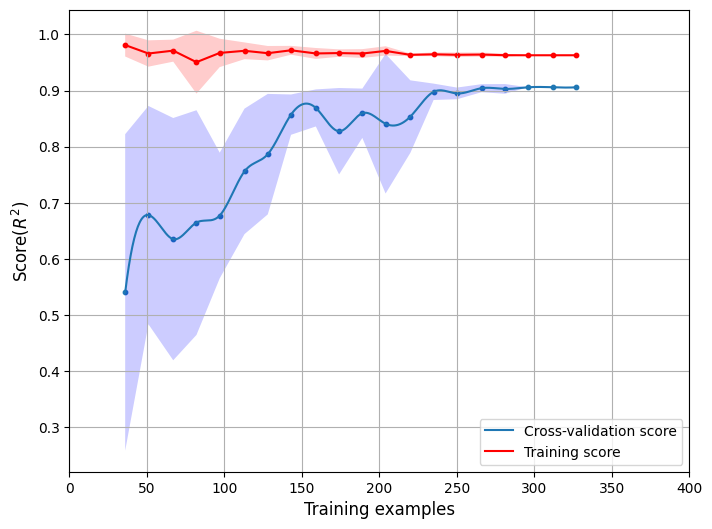

In [4]:
labels = rates 

min_label = min(labels)
max_label = max(labels)
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
r2 = learning_curve['r2']
r2t = learning_curve['r2t']
r2std = learning_curve['r2_std']
r2tstd = learning_curve['r2t_std']
labels = rates


xnew = np.linspace(min_label, max_label, 500)
func_1 = interp1d(labels, r2, kind='cubic')
r2_new = func_1(xnew)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.plot(xnew,r2_new, '-', label = 'Cross-validation score')  
# ax.plot(labels, r2, '-', label = 'Cross-validation score')
ax.scatter(labels, r2, s=10)
ax.fill_between(labels, r2-r2std, r2+r2std, alpha=0.2, facecolor='b')


ax.plot(labels, r2t, '-r', label = 'Training score')
ax.scatter(labels, r2t, s=10, c='r')
ax.fill_between(labels, r2t-r2tstd, r2t+r2tstd, alpha=0.2, facecolor='r')
plt.xlim((0, 400))
plt.legend(loc='lower right')

ax.set_xlabel("Training examples", fontsize=12)
ax.set_ylabel("Score($R^2$)", fontsize=12)
ax.grid()
plt.savefig("./result/learning curve-PhO.tif", dpi=600)
plt.savefig('./result/learning curve-PhO.png', dpi=600)

# Feature Engineering - Feature Screening

In [5]:
'''
The dataset is divided into training/validation and out-of-sample (OOS) test sets based on predefined indices. 
The division process ensures that the test data is completely held out during the training and validation phases 
to properly evaluate the model's performance on unseen data.

- `test_index`: This is the primary set of indices used to define the initial part of the OOS test set.
- `test_index_db2`: Additional test indices derived by adding half the length of the dataset (`length_db`) to each index in `test_index`.
  This approach accounts for the potential scenario where test data points are distributed across the dataset.

The following steps are executed in the code:
1. `length_db` is calculated as half the total number of data points, used to adjust the indices for the second half of the dataset.
2. `test_index_db2` is generated to cover any test data points that might appear in the latter half of the dataset.
3. `full_test_index` combines `test_index` and `test_index_db2` to form the complete set of indices for the OOS test set.
4. The data points at these indices are then extracted as the OOS test set (`oos_x`, `oos_y`), ensuring they are not used in model training or validation.
5. The remaining data points are used to create the training/validation set (`X_scaled`, `y_train_val`), which is also standardized to aid in model training.
'''

directory = "./result"
file_name = 'PhO-ox.npz'


file_path = os.path.join(directory, file_name)


PhO_ox_npz = np.load(file_path, allow_pickle=True)


print("Arrays in the NPZ file:", PhO_ox_npz.files)
PhO_ox_data = PhO_ox_npz['data']
PhO_ox_columns = PhO_ox_npz['columns']
physorg_react_data_df = pd.DataFrame(PhO_ox_data, columns=PhO_ox_columns)

physorg_react_data_df.dropna(inplace=True)  

# 准备数据
test_index = [87, 381, 316, 120, 479, 448, 197, 507, 198, 379, 508, 313, 265, 449, 453, 89, 292, 88, 121, 266, 454, 455, 447, 456, 271, 
              269, 294, 293, 297, 248, 249, 464, 312, 499, 289, 509, 511, 267, 166, 386, 290, 392, 498, 91, 488, 7, 278, 54, 285, 94, 303, 
              358, 444, 5, 286, 98, 458, 2, 291, 268, 470, 262, 308, 272, 53, 354, 512, 360, 495, 468, 391, 310, 307, 457, 306, 258, 352, 
              305, 357, 131, 362, 42, 311, 460, 304, 510, 298, 263, 350, 368, 100, 115, 61, 500, 56, 90, 442, 277, 487, 309, 0, 1, 356]

External_index = [462,119 ,396, 273, 375, 503, 318, 504, 472, 463, 465, 341, 342, 340, 477, 327, 348, 476,423 ,377, 332, 333, 182, 181,
                  349, 183, 112, 328, 323, 324, 113, 329, 330, 331, 144, 145,149, 150, 153, 151, 152, 154, 147, 485, 148, 482, 370, 373,
                  372, 146, 371]

all_indices = set(range(len(physorg_react_data_df)))
train_val_indices = sorted(list(all_indices - set(test_index) - set(External_index))) 
X = physorg_react_data_df.drop(columns=['YRed/Ox', 'compound_name'])
y = physorg_react_data_df['YRed/Ox']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.iloc[train_val_indices])
y_train_val = y.iloc[train_val_indices]
test_x = scaler.transform(X.iloc[test_index])
test_y = y.iloc[test_index]

Arrays in the NPZ file: ['data', 'columns']


In [6]:
random_seed = 2024
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFECV
# The max_depth and n_estimators are identified by hyperparameters optimization procedure, which is demonstrated in Notebook 3.
model = BayesianRidge( alpha_1=0.001, alpha_2=1e-06,lambda_1 =1e-06, lambda_2 =0.0001)
cv = KFold(n_splits=10, shuffle=True, random_state=random_seed)
selector = RFECV(model, step=1, min_features_to_select=1,cv=cv, n_jobs=-1)
selector = selector.fit(X_scaled, y_train_val)
sel_index = np.where(selector.support_==True)[0]
print('----Reserved Descriptors----')
print('Size: %d'%len(sel_index))
print('Index of selected descriptors', sel_index + 1)

----Reserved Descriptors----
Size: 21
Index of selected descriptors [  1   4   8  11  34  36  37  46  50  59  61  63  66  79  85  86  90  91
  93  95 102]


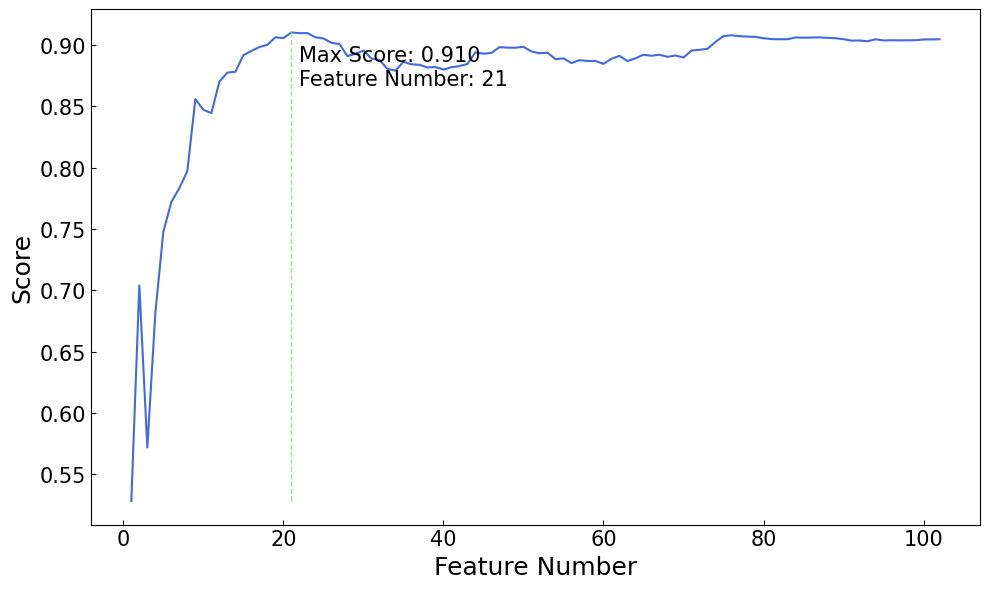

In [7]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(10, 6)) 

y_r2 = selector.cv_results_['mean_test_score']
x_1_index = [item + 1 for item in range(len(y_r2))]


max_index = np.argmax(y_r2) + 1
max_score = np.max(y_r2)


plt.plot(x_1_index, y_r2, c='royalblue')

plt.plot([max_index, max_index], [np.min(y_r2), max_score], c='lightgreen', linewidth=1, linestyle='--')#绘制一条垂直线，从y_r2的最高点到最低点

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.text(max_index + 1, max_score - 0.010, f'Max Score: {max_score:.3f}', fontsize=15, verticalalignment='top')
plt.text(max_index + 1, max_score - 0.030, f'Feature Number: {max_index}', fontsize=15, verticalalignment='top')

plt.xlabel('Feature Number', fontsize=18)
plt.ylabel('Score', fontsize=18)

plt.tick_params(axis='both', which='both', direction='in', bottom=True, left=True)

plt.tight_layout()
plt.savefig('./RFECV-PhO.png', dpi=600)
plt.show()

# Model Training

Training Set

In [8]:
from scipy.stats import pearsonr
val_Y = []
val_P = []
kfold = KFold(n_splits=10, shuffle=True, random_state=random_seed)
for train_idx,val_idx in kfold.split(X_scaled):
    train_x,val_x = X_scaled[:,sel_index][train_idx],X_scaled[:,sel_index][val_idx]
    train_y,val_y = y_train_val.iloc[train_idx],y_train_val.iloc[val_idx]
    val_P_ = []
    for try_ in range(10): 
        model.fit(train_x,train_y)
        val_p = model.predict(val_x)
        val_P_.append(val_p)
    val_P_ = np.mean(val_P_,axis=0)
    val_P.append(val_P_)
    val_Y.append(val_y)
val_P = np.concatenate(val_P)
val_Y = np.concatenate(val_Y)
mae = mean_absolute_error(val_Y,val_P)
r2 = r2_score(val_Y,val_P)
pearson_r,_ = pearsonr(val_Y,val_P)

print("MAE: %.4f, R2: %.4f, Pearson R: %.4f"%(mae,r2,pearson_r))

MAE: 0.0688, R2: 0.9283, Pearson R: 0.9637


In [61]:
plt.figure(figsize=(4.5,4.5))

plt.scatter(val_Y,val_P,c='#992f87')

plt.text(-3,0.8,'$R^2$: %.3f'%r2_score(val_Y,val_P),fontsize=14)
plt.text(-3,0.5,'Pearson R: %.3f'%pearsonr(val_Y,val_P)[0],fontsize=14)
plt.text(-3,0.15,'MAE: %.3f V'%mean_absolute_error(val_Y,val_P),fontsize=14)

plt.plot([-3,1],[-3,1],c='#992f87')
plt.xlabel('E $_{Exp}$ (V)',fontsize=14)
plt.ylabel('E $_{ML}$ (V)',fontsize=14)
plt.xticks([-3, -2, -1, 0,1],list(map(str,[-3, -2, -1, 0,1])),fontsize=13)
plt.yticks([-3, -2, -1,0,1],list(map(str,[-3, -2, -1, 0,1])),fontsize=13)

plt.tick_params(bottom='on',left='on')
plt.tight_layout()
plt.savefig('./result/CV-E-BRPhO.tif', dpi=600) 
plt.savefig('./result/CV-E-BRPhO.png', dpi=600)

Test Set

In [10]:
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error
from scipy.stats import pearsonr

test_P = []
feature_importance = []import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error
from scipy.stats import pearsonr

test_P = []
feature_importance = []

for _ in range(10):
    model.fit(X_scaled[:, sel_index], y_train_val)
    
    feature_importance.append(np.abs(model.coef_))
    
    test_p = model.predict(test_x[:, sel_index])
    test_P.append(test_p)

test_p = np.mean(test_P, axis=0)
feature_importance = np.mean(feature_importance, axis=0)

sel_feature_names = np.array(PhO_ox_columns)[sel_index + 1]

sorted_feature_index = np.argsort(feature_importance)
importance_desc_names = sel_feature_names[sorted_feature_index]
importance_of_sel_desc = feature_importance[sorted_feature_index]

r2 = r2_score(test_y, test_p)
pearson_r, _ = pearsonr(test_y, test_p)
mae = mean_absolute_error(test_y, test_p)

print("MAE: %.4f, R2: %.4f, Pearson R: %.4f" % (mae, r2, pearson_r))


for _ in range(10):
    model.fit(X_scaled[:, sel_index], y_train_val)
    
    feature_importance.append(np.abs(model.coef_))
    
    test_p = model.predict(test_x[:, sel_index])
    test_P.append(test_p)

test_p = np.mean(test_P, axis=0)
feature_importance = np.mean(feature_importance, axis=0)

sel_feature_names = np.array(PhO_rdkit_maccs_columns)[sel_index + 1]

sorted_feature_index = np.argsort(feature_importance)
importance_desc_names = sel_feature_names[sorted_feature_index]
importance_of_sel_desc = feature_importance[sorted_feature_index]

r2 = r2_score(test_y, test_p)
pearson_r, _ = pearsonr(test_y, test_p)
mae = mean_absolute_error(test_y, test_p)

print("MAE: %.4f, R2: %.4f, Pearson R: %.4f" % (mae, r2, pearson_r))


MAE: 0.0901, R2: 0.9515, Pearson R: 0.9759


In [60]:
plt.figure(figsize=(4.5,4.5))

plt.scatter(test_y,test_p,c='#D89090')
plt.text(-3.1,0.8,'$R^2$: %.3f'%r2_score(test_y,test_p),fontsize=14)
plt.text(-3.1,0.5,'Pearson R: %.3f'%pearsonr(test_y,test_p)[0],fontsize=14)
plt.text(-3.1,0.15,'MAE: %.3f V'%mean_absolute_error(test_y,test_p),fontsize=14)
plt.plot([-3,1],[-3,1],c='#D89090')
plt.xlabel('E $_{Exp}$ (V)',fontsize=14)
plt.ylabel('E $_{ML}$ (V)',fontsize=14)
plt.xticks([-3, -2, -1, 0,1],list(map(str,[-3, -2, -1, 0,1])),fontsize=13)
plt.yticks([-3, -2, -1, 0,1],list(map(str,[-3, -2, -1, 0,1])),fontsize=13)
plt.tick_params(bottom='on',left='on')
plt.tight_layout()
plt.savefig('./result/CV-E-BRPhO-quan-oos.tif', dpi=600)  
plt.savefig('./result/CV-E-BRPhO-quan-oos.png', dpi=600)

# Comparison of real and projected data

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

def fixed_selector_transform(X):
    return X[:, sel_index]

fixed_selector = FunctionTransformer(fixed_selector_transform)

pipeline = Pipeline([
    ('scaler', scaler),
    ('fixed_selector', fixed_selector),
    ('model', model)
])

X_full = np.vstack((X.iloc[train_val_indices], X.iloc[test_index]))  
y_full = np.concatenate((y_train_val, test_y))

pipeline.fit(X_full, y_full)

import shap
import joblib

X_scaled_full = pipeline.named_steps['scaler'].transform(X_full)
X_selected_full = pipeline.named_steps['fixed_selector'].transform(X_scaled_full)

explainer = shap.LinearExplainer(pipeline.named_steps['model'], X_selected_full)
shap_values = explainer.shap_values(X_selected_full)

joblib.dump(pipeline, 'Eox.joblib')


['Eox.joblib']

In [14]:
y_pred_full = pipeline.named_steps['model'].predict(X_selected_full)

selected_feature_names = importance_desc_names  

y_true_aligned = y_full


df = pd.DataFrame(X_scaled_full[:,sel_index], columns=selected_feature_names)

df['Predicted_Y'] = y_pred_full

df['True_Y'] = y_true_aligned

missing_true_y = df['True_Y'].isna().sum()
if missing_true_y > 0:
    print(f"发现{missing_true_y}个真实值的空白，尝试修复索引对齐...")

# 删除空白值的行并上移
df = df.dropna(subset=['True_Y']).reset_index(drop=True)

# 显示数据表
print(df)

# 将数据表保存到CSV文件
df.to_csv('selected_features_and_predicted_y_with_true_y.csv', index=False)


     Chemical potential      Pi_2    ESPmax   ALIEmax  ALIEmax_2  \
0             -0.852335 -0.680213 -0.852336 -0.853106   0.474793   
1             -1.753160 -1.044191 -1.753160 -1.754189   0.897539   
2             -0.936259 -0.864453 -0.936204 -0.937046   0.786953   
3              1.114147  1.074642  1.114145  1.113868  -0.120130   
4              1.109010  1.069538  1.109008  1.108761  -1.058008   
..                  ...       ...       ...       ...        ...   
462           -1.343928 -1.126240 -1.343928 -1.344857   0.119239   
463            1.056355  1.122225  1.056409  1.056084   0.079345   
464           -0.339580 -0.337090 -0.339581 -0.340215   0.734460   
465           -0.744848 -0.830810 -0.744849 -0.745625   1.488262   
466            0.807376  0.907087  0.807375  0.807017   0.432799   

     beta_HOMO_LUMO_Gap_2  Overall_Surface_Area  Polar_Area_2       E00  \
0                2.326149             -0.836217      0.758863  1.720088   
1                1.039611        

# Shap analysis and normalized presentation and data processing

Feature Importance (before and after normalization):
Polar_Area_2: Original SHAP Value = 9.7782, Normalized SHAP Value = 0.0044
MPI_2: Original SHAP Value = 12.7811, Normalized SHAP Value = 0.0058
Pi_2: Original SHAP Value = 34.8846, Normalized SHAP Value = 0.0157
Overall_Surface_Area: Original SHAP Value = 34.9631, Normalized SHAP Value = 0.0157
ALIEmax: Original SHAP Value = 36.8886, Normalized SHAP Value = 0.0166
beta_HOMO_LUMO_Gap_2: Original SHAP Value = 45.0531, Normalized SHAP Value = 0.0203
ALIEmax_2: Original SHAP Value = 45.2804, Normalized SHAP Value = 0.0204
ESPmax: Original SHAP Value = 46.1926, Normalized SHAP Value = 0.0208
Chemical potential: Original SHAP Value = 49.7585, Normalized SHAP Value = 0.0224
E00: Original SHAP Value = 74.8946, Normalized SHAP Value = 0.0337
E_HOMO(N): Original SHAP Value = 106.9793, Normalized SHAP Value = 0.0482
Nucleophilicity index: Original SHAP Value = 107.1119, Normalized SHAP Value = 0.0482
Density: Original SHAP Value = 109.1243, Nor

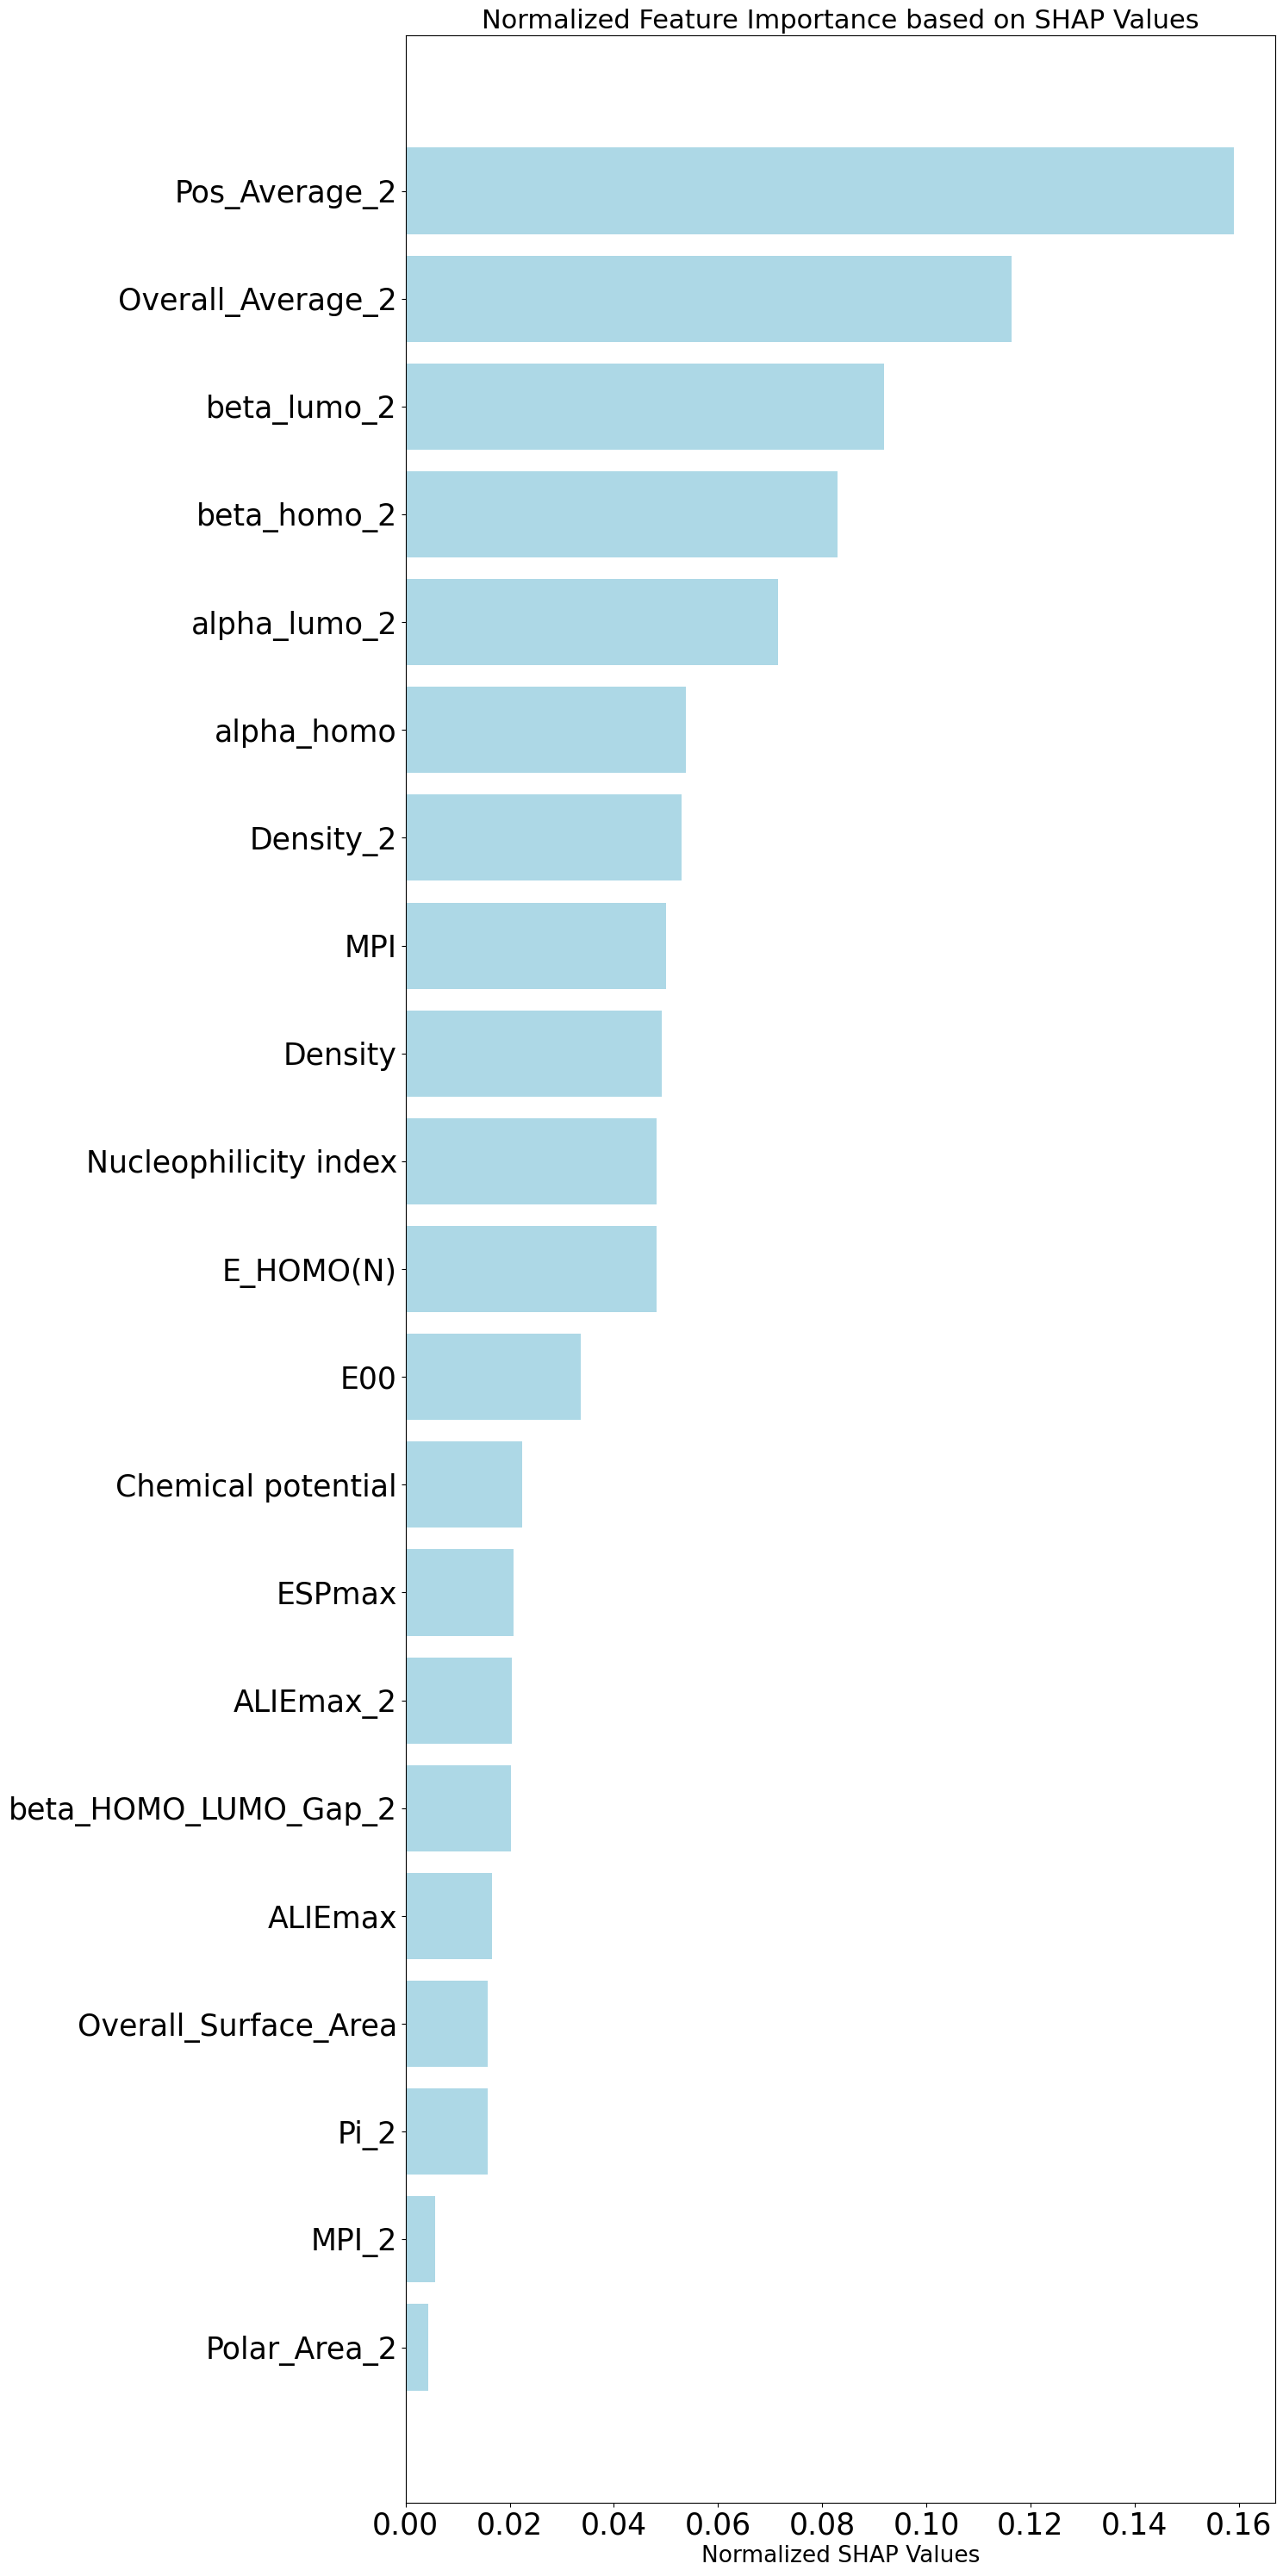

In [15]:
shap_abs_sum = np.sum(np.abs(shap_values), axis=0)

shap_values_normalized = shap_abs_sum / np.sum(shap_abs_sum)

sorted_indices = np.argsort(shap_values_normalized)
importance_desc_names = np.array(PhO_rdkit_maccs_columns)[sel_index + 1][sorted_indices]
importance_of_sel_desc = shap_values_normalized[sorted_indices]

print("Feature Importance (before and after normalization):")
for i in range(len(importance_desc_names)):
    print(f"{importance_desc_names[i]}: Original SHAP Value = {shap_abs_sum[sorted_indices[i]]:.4f}, Normalized SHAP Value = {importance_of_sel_desc[i]:.4f}")
    
fig = plt.figure(figsize=(15, 30))
plt.barh(importance_desc_names, importance_of_sel_desc, color='lightblue', align='center')
plt.xlabel('Normalized SHAP Values', fontsize=19)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.title('Normalized Feature Importance based on SHAP Values', fontsize=22)
plt.tight_layout()

plt.savefig('./result/importance_desc_names_normalized.png', dpi=600)
plt.show()


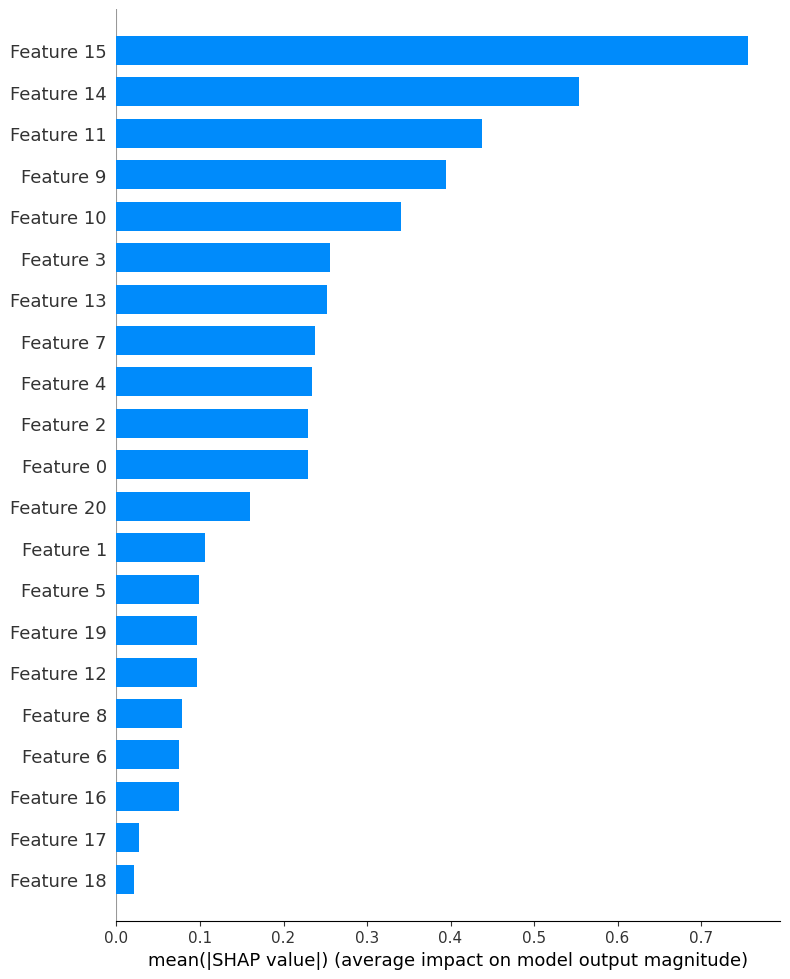

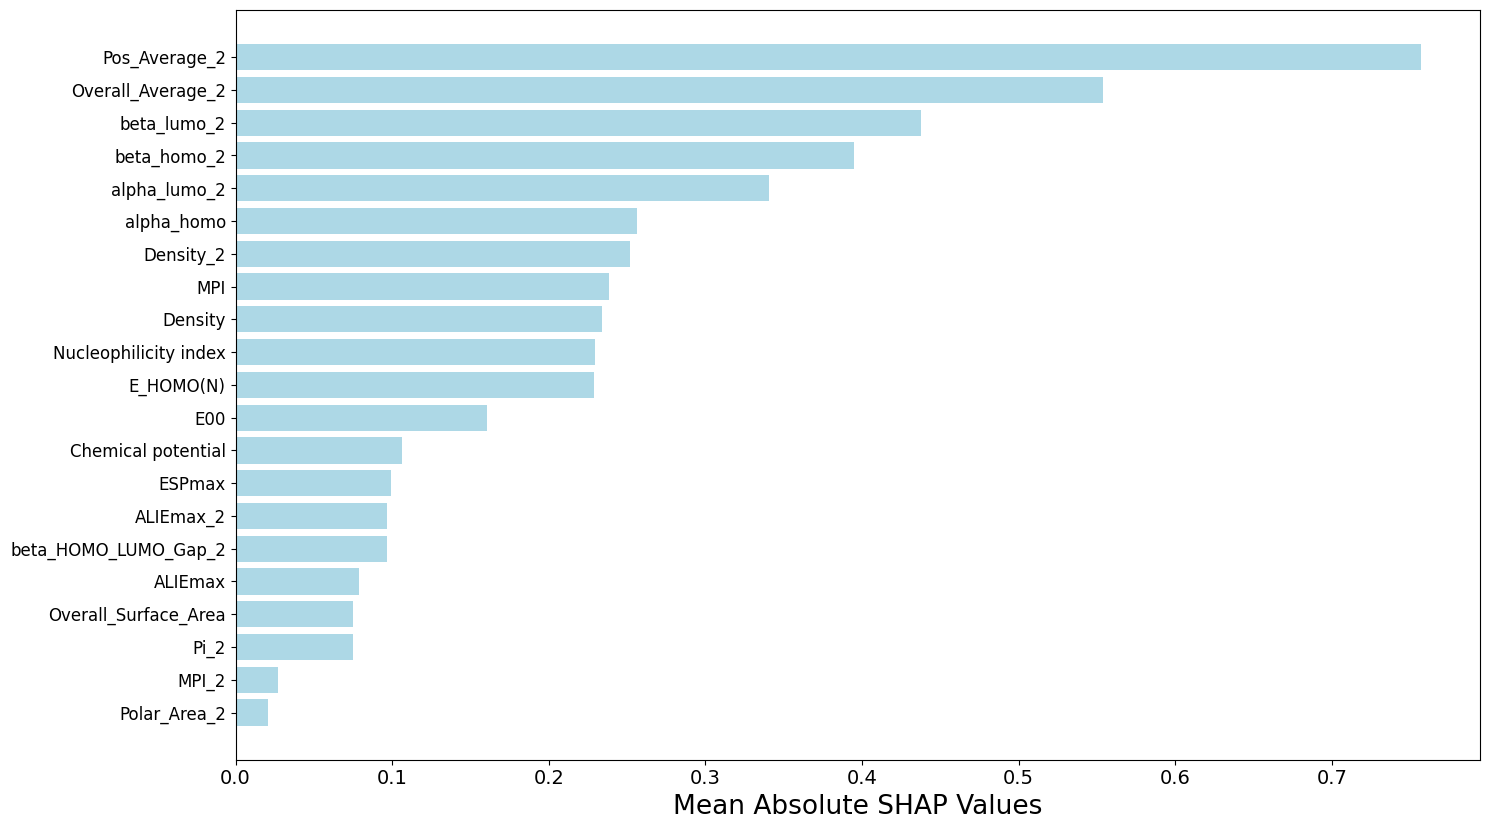

In [16]:
import shap

shap.summary_plot(
    shap_values, 
    X_selected_full, 
    plot_type="bar", 
    max_display=X_selected_full.shape[1] 
)

mean_shap_values = np.abs(shap_values).mean(axis=0)
importance_desc_names = np.array(PhO_rdkit_maccs_columns)[sel_index + 1][np.argsort(mean_shap_values)]
importance_of_sel_desc = mean_shap_values[np.argsort(mean_shap_values)]

fig = plt.figure(figsize=(15, X_selected_full.shape[1] * 0.4))
plt.barh(importance_desc_names, importance_of_sel_desc, color='lightblue', align='center')
plt.xlabel('Mean Absolute SHAP Values', fontsize=19)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


In [18]:
shap.summary_plot(shap_values, X_selected_full, feature_names=np.array(PhO_rdkit_maccs_columns)[sel_index+1])
plt.suptitle("Normalized Feature Importance based on SHAP", fontsize=20)
plt.tight_layout()
plt.savefig('./result/shap_summary_plot.png', dpi=600)
plt.show()


In [33]:
shap.summary_plot(shap_values, X_selected_full, feature_names=np.array(PhO_rdkit_maccs_columns)[sel_index+1], max_display=8)

plt.gca().tick_params(axis='y', labelsize=16) 
plt.tight_layout()
plt.savefig('./result/shap_summary_plot-little.png', dpi=600)
plt.show()


In [22]:
feat_names = np.array(selected_feature_names)[: X_selected_full.shape[1]]

max_index = np.argmax(y_pred_full)

shap_values_max_sample = shap_values[max_index]
X_max_sample = X_selected_full[max_index]

X_max_sample = np.round(X_max_sample, 3)
shap_values_max_sample = np.round(shap_values_max_sample, 3)

force_plot = shap.force_plot(
    explainer.expected_value, 
    shap_values_max_sample, 
    X_max_sample, 
    feature_names=feat_names, 
    matplotlib=True
)

plt.savefig('./result/shapcolorplot-max-Y-improved.jpeg', dpi=600, format='jpeg', bbox_inches='tight')
plt.show()


In [23]:
feat_names = np.array(selected_feature_names)[: X_selected_full.shape[1]]

min_index = np.argmin(y_pred_full)

shap_values_min_sample = shap_values[min_index]
X_min_sample = X_selected_full[min_index]

X_min_sample = np.round(X_min_sample, 3)
shap_values_min_sample = np.round(shap_values_min_sample, 3)

force_plot = shap.force_plot(
    explainer.expected_value, 
    shap_values_min_sample, 
    X_min_sample, 
    feature_names=feat_names, 
    matplotlib=True
)

plt.savefig('./result/shapcolorplot-min-Y-improved.jpeg', dpi=600, format='jpeg', bbox_inches='tight')
plt.show()


In [50]:
import shap
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.size'] = 16

abs_shap = np.abs(shap_values_min_sample)
top5_idx = np.argsort(abs_shap)[-5:]  

order = np.argsort(shap_values_min_sample[top5_idx])
top5_idx = top5_idx[order]

X_min_sample_top5 = X_min_sample[top5_idx]
shap_values_min_sample_top5 = shap_values_min_sample[top5_idx]
feat_names_top5 = feat_names[top5_idx]

full_fx = explainer.expected_value + np.sum(shap_values_min_sample)

S_top5 = np.sum(shap_values_min_sample_top5)

expected_value_new = full_fx - S_top5

force_plot = shap.force_plot(
    expected_value_new,
    shap_values_min_sample_top5,
    X_min_sample_top5,
    feature_names=feat_names_top5,
    matplotlib=True
)

fig = plt.gcf()
for ax in fig.get_axes():
    for text in ax.texts:
        txt = text.get_text()
        x, y = text.get_position()
        if 'f(x)' in txt:
            text.set_position((x, y + 0.07))
        elif "Overall_Average_2" in txt:
            text.set_position((x - 0.05, y+0.05))  
        elif "-3.05" in txt:
            text.set_position((x, y + 0.05))
        elif "Nucleophilicity index" in txt:
            text.set_position((x - 0.06, y - 0.05))
        elif "Density" in txt:
            text.set_position((x - 0.06, y+0.05))
        elif "MPI_2" in txt:
            text.set_position((x , y +0.05))
        elif "MPI" in txt:
            text.set_position((x , y +0.05)) 

        text.set_fontsize(18)

plt.savefig('./result/shapcolorplot-min-Y-improved_top5.jpeg', dpi=600, format='jpeg', bbox_inches='tight')
plt.show()


# Save model and out-of-bank test set testing

In [35]:
pipeline = joblib.load('Eox.joblib')
X_external = X.iloc[External_index]
y = physorg_react_data_df['YRed/Ox']
y_external = y.iloc[External_index]
ext_pred = pipeline.predict(X_external.to_numpy())
compound_names = physorg_react_data_df['compound_name']
compound_names_external = compound_names.iloc[External_index]


In [36]:
results = pd.DataFrame({
    'Compound Name': compound_names_external.values,
    'Predicted Value': ext_pred,
    'Eexp': y_external.values
})

print(results)

                        Compound Name  Predicted Value  Eexp
0                 Ir-q-bt-Me2-bpy+-ox        -1.253053 -1.18
1                  Ir(dfppz)2Phtz+-ox        -1.167987 -1.12
2                    Irppo-acacSPh-ox        -1.354310 -1.28
3                 Ir3CFbt-HbpdcNMe-ox        -0.969347 -0.98
4                          IrmpbiL-ox        -1.645046  -1.5
5              mer-Ir(dfppz)2(ptp)-ox        -1.464464  -1.3
6                          IrcpbiL-ox        -1.464745 -1.41
7                 mer-Ir(ppy)2(pf)-ox        -1.770110 -1.69
8               Ir-tolpy2-dethqpy+-ox        -1.313675 -1.31
9                 Ir-q-bt-Ph2-acac-ox        -1.359395 -1.37
10             Ir-tBuFppy2-tBuCN2+-ox        -1.790915 -1.83
11                Irdfppy-CO2Mepic-ox        -1.573762 -1.43
12                Irdfppy-COCF3pic-ox        -1.516840 -1.27
13                   Irdfppy-CNpic-ox        -1.602807 -1.33
14                 Ir-tPhTAZ-pzpy+-ox        -1.455118 -1.43
15                Ir-dFC

In [58]:
ext_r2 = r2_score(y_external,ext_pred)
ext_mae = mean_absolute_error(y_external,ext_pred)
ext_pearson_r = pearsonr(y_external,ext_pred)[0]

plt.figure(figsize=(4.5,4.5))

plt.scatter(y_external,ext_pred,c='#efae42')

plt.text(-3,0.8,'$R^2$: %.3f'%ext_r2,fontsize=14)
plt.text(-3,0.5,'Pearson R: %.3f'%ext_pearson_r,fontsize=14)
plt.text(-3,0.15,'MAE: %.3f V'%ext_mae,fontsize=14)

plt.plot([-3,1],[-3,1],c='#efae42')
plt.xlabel('E $_{Exp}$ (V)',fontsize=14)
plt.ylabel('E $_{ML}$ (V)',fontsize=14)
plt.xticks([-3, -2, -1, 0,1],list(map(str,[-3, -2, -1, 0,1])),fontsize=13)
plt.yticks([-3, -2, -1, 0,1],list(map(str,[-3, -2, -1, 0,1])),fontsize=13)
plt.tick_params(bottom='on',left='on')

plt.tight_layout()
plt.savefig('./result/external-GBRPhO.tif', dpi=600) 
plt.savefig('./result/external-GBRPhO.png',dpi= 600)

# Regression curve plotting and error calculation

In [51]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error
from scipy.stats import pearsonr

train_r2 = r2_score(val_Y, val_P)
train_pearson_r, _ = pearsonr(val_Y, val_P)
train_mae = mean_absolute_error(val_Y, val_P)

test_r2 = r2_score(test_y, test_p)
test_pearson_r, _ = pearsonr(test_y, test_p)
test_mae = mean_absolute_error(test_y, test_p)

ext_r2 = r2_score(y_external, ext_pred)
ext_mae = mean_absolute_error(y_external, ext_pred)
ext_pearson_r = pearsonr(y_external, ext_pred)[0]

re_train = np.abs(val_P - val_Y) / np.abs(val_Y)
re_test = np.abs(test_p - test_y) / np.abs(test_y)
re_ext = np.abs(ext_pred - y_external) / np.abs(y_external)

accuracy_train = np.mean(re_train <= 0.3) * 100
accuracy_test = np.mean(re_test <= 0.3) * 100
accuracy_ext = np.mean(re_ext <= 0.3) * 100
accuracy_train1 = np.mean(re_train <= 0.2) * 100
accuracy_test1 = np.mean(re_test <= 0.2) * 100
accuracy_ext1 = np.mean(re_ext <= 0.2) * 100

print(f"Training Accuracy (RE±0.3): {accuracy_train:.2f}%")
print(f"Test Accuracy (RE±0.3): {accuracy_test:.2f}%")
print(f"External Test Accuracy (RE±0.3): {accuracy_ext:.2f}%")
print(f"Training Accuracy (RE±0.2): {accuracy_train1:.2f}%")
print(f"Test Accuracy (RE±0.2): {accuracy_test1:.2f}%")
print(f"External Test Accuracy (RE±0.2): {accuracy_ext1:.2f}%")

plt.figure(figsize=(6, 6))

plt.scatter(val_Y, val_P, c='#1F2124', label='Training Set', alpha=0.6)

plt.scatter(test_y, test_p, c='#89AA7B', label='Test Set', alpha=0.6)
plt.text(-0.9, -2.45, '$R^2$: %.3f' % test_r2, fontsize=18)
plt.text(-0.9,-2.70, 'Pearson R: %.3f' % test_pearson_r, fontsize=18)
plt.text(-0.9,-2.95, 'MAE: %.3f V' % test_mae, fontsize=18)
plt.text(-0.9,-3.2, f'RE±0.3: {accuracy_test:.2f}%', fontsize=18)
plt.text(-0.9,-3.45, f'RE±0.2: {accuracy_test1:.2f}%', fontsize=18)

plt.scatter(y_external, ext_pred, c='#efae42', label='External Test Set', alpha=0.6)

plt.plot([-3.2, 1], [-3.2, 1], c='black', linestyle='--', label='Ideal Fit')

plt.plot([-3.2, 1], [-3.2 + 0.3, 1 + 0.3], c='orange', linestyle='--', label='Error bounds of ±0.3 V')
plt.plot([-3.2, 1], [-3.2 - 0.3, 1 - 0.3], c='orange', linestyle='--')

plt.xlabel('E $_{Exp}$ (V)', fontsize=22)
plt.ylabel('E $_{ML}$ (V)', fontsize=22)
plt.legend(fontsize=13)

plt.xticks([-3,-2,-1, 0,1], list(map(str, [-3,-2,-1, 0,1])), fontsize=18)
plt.yticks([-3,-2,-1, 0,1], list(map(str, [-3,-2,-1, 0,1])), fontsize=18)

plt.tight_layout()

plt.savefig('./result/combined_CV_results_with_error_range_optimized.png', dpi=600)
plt.savefig('./result/combined_CV_results_with_error_range_optimized.tif', dpi=600)
plt.show()


Training Accuracy (RE±0.3): 96.98%
Test Accuracy (RE±0.3): 93.20%
External Test Accuracy (RE±0.3): 98.04%
Training Accuracy (RE±0.2): 92.86%
Test Accuracy (RE±0.2): 89.32%
External Test Accuracy (RE±0.2): 92.16%
